In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import hsv_to_rgb


In [2]:
musica = pd.read_csv('musica_limpio.csv')

In [118]:
csv= musica.copy()

In [120]:
csv.to_csv('musica_tableau.csv', sep=";", decimal=",")

In [5]:
musica_color = musica.copy()

In [15]:
musica_color['rmse_1']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
140    0.0
141    0.0
142    0.0
143    0.0
144    0.0
Name: rmse_1, Length: 145, dtype: float64

In [7]:
musica_color

,artist,song,genre,subgenre,year,beats,tempo,mfcc,zero_crossing_rate,rolloff,...,rmse_11,rmse_12,rmse_13,rmse_14,rmse_15,rmse_16,rmse_17,rmse_18,rmse_19,rmse_20
0,Alice Deejay,Better Off Alone,Electronica,Dance,2000,381,135.999178,3.403080,0.101790,9249.568195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Calvin Harris y Ellie Goulding,Miracle,Electronica,Dance,2023,433,143.554688,4.800573,0.061558,6829.635627,...,0.000000,0.000000,0.000014,0.006129,0.068055,0.164806,0.212698,0.245858,0.261388,0.241509
2,David Guetta y Anne,Baby Don’t Hurt Me,Electronica,Dance,2023,351,129.199219,8.427510,0.059146,6718.444180,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.031874,0.132987,0.220642,0.300733
3,Edward Maya & Vika Jigulina,Stereo Love,Electronica,Dance,2009,382,126.048018,4.400158,0.070170,7335.060038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Erika,I Don't Know,Electronica,Dance,2004,412,129.199219,6.315407,0.039045,6101.478814,...,0.002719,0.003737,0.004493,0.005335,0.006048,0.007054,0.008526,0.010066,0.011933,0.013245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Titanium,Dukun (Marco Bailey Remix),Electronica,Techno,2003,643,139.674831,-5.148223,0.039373,6004.217913,...,0.009680,0.009527,0.007534,0.004597,0.004321,0.003913,0.002949,0.001552,0.001334,0.001281
141,Oscar Mulero,Anaconda,Electronica,Techno,2005,946,139.674831,3.087595,0.109243,8918.494381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000026,0.020305,0.051187,0.063352,0.068378
142,Tom Hafman vs submission,El vacio mix,Electronica,Techno,2003,955,135.999178,5.747701,0.086701,7736.011952,...,0.000000,0.000008,0.007187,0.008954,0.015554,0.018085,0.016891,0.017285,0.012988,0.009424
143,Tomaz vs Filterheadz,Lazy people,Electronica,Techno,2002,1026,135.999178,8.473179,0.054180,6651.333572,...,0.000027,0.000033,0.000036,0.000034,0.000030,0.000034,0.000036,0.000037,0.000036,0.000030


In [ ]:
### Codigo para crear color, matiz, saturación y luminosidad.

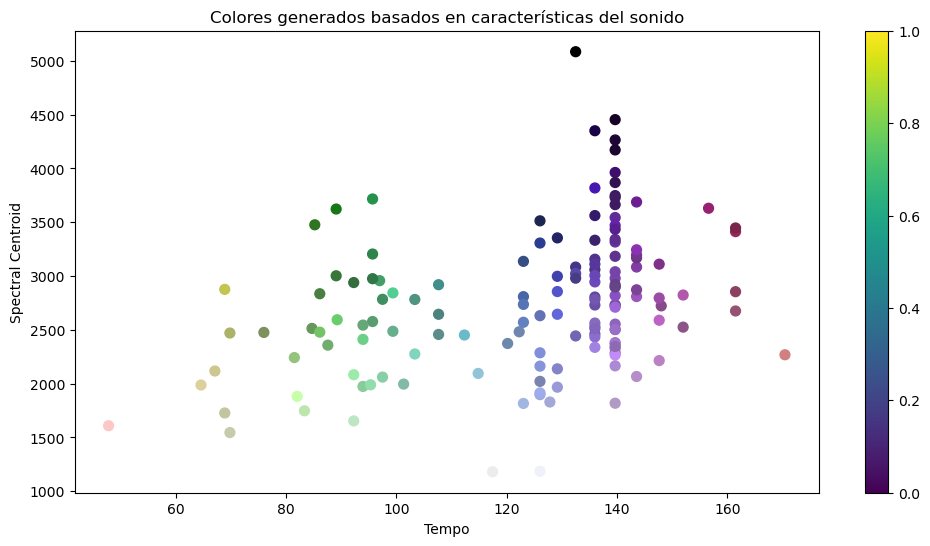

In [23]:
# Seleccionamos las columnas relevantes
features = ['tempo', 'zero_crossing_rate', 'rolloff', 'spectral_centroid', 'spectral_bandwidth']

# Normalizamos las columnas seleccionadas
for feature in features:
    musica_color[feature + '_norm'] = (musica_color[feature] - musica_color[feature].min()) / (musica_color[feature].max() - musica_color[feature].min())

# Asignamos colores basados en las características
def assign_color(row):
    # Usamos las características normalizadas para definir Hue, Saturation, Lightness
    hue = row['tempo_norm']  # Relacionamos el tempo con el matiz
    saturation = row['rolloff_norm']  # Relacionamos el rolloff con la saturación
    lightness = 1 - row['zero_crossing_rate_norm']  # Relacionamos el zero crossing con la luminosidad
    # Convertimos HSL a RGB
    rgb = hsv_to_rgb([hue, saturation, lightness])
    # Convertimos a formato hexadecimal para usar en visualizaciones
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

musica_color['color'] = musica_color.apply(assign_color, axis=1)

# Visualizamos los colores generados
plt.figure(figsize=(12, 6))
plt.scatter(musica_color['tempo'], musica_color['spectral_centroid'], c=musica_color['color'], s=50)
plt.colorbar()  # Agregar una barra de color si tiene sentido
plt.xlabel('Tempo')
plt.ylabel('Spectral Centroid')
plt.title('Colores generados basados en características del sonido')
plt.show()

# Guardamos el DataFrame con los colores
musica_color.to_csv('canciones_con_colores.csv', index=False)

In [33]:
musica_colores = pd.read_csv('canciones_con_colores.csv')

In [74]:
pd.set_option('display.max_columns', 500)
musica_colores.sort_values(by=['spectral_centroid'], ascending=False)

,artist,song,genre,subgenre,year,beats,tempo,mfcc,zero_crossing_rate,rolloff,spectral_centroid,spectral_bandwidth,chroma_stft,rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6,rmse_7,rmse_8,rmse_9,rmse_10,rmse_11,rmse_12,rmse_13,rmse_14,rmse_15,rmse_16,rmse_17,rmse_18,rmse_19,rmse_20,beats_norm,zero_crossing_rate_norm,rolloff_norm,rmse_12_norm,spectral_bandwidth_norm,tempo_norm,spectral_centroid_norm,color
122,Jeff Mills & Dj Rolando,Jaguar remix,Electronica,Techno,2002,825,132.512019,-0.440394,0.132721,9654.174138,5085.331098,3978.969982,0.566621,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.472496,1.000000,1.000000,0.000000,0.949187,0.690525,1.000000,#000000
111,Alex Trackone,Genetiko,Electronica,Techno,2006,865,139.674831,6.518306,0.116584,8934.485250,4454.064876,3817.410617,0.701299,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000103,0.137479,0.193366,0.274702,3.044780e-01,2.810430e-01,0.269073,0.197353,1.554220e-01,1.430150e-01,0.098545,0.081968,0.075137,0.069169,0.069072,0.500705,0.852699,0.907386,0.532079,0.883140,0.748948,0.838310,#140325
0,Alice Deejay,Better Off Alone,Electronica,Dance,2000,381,135.999178,3.403080,0.101790,9249.568195,4350.674715,4103.266704,0.464332,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.159379,0.717660,0.947933,0.000000,1.000000,0.718968,0.811828,#190347
141,Oscar Mulero,Anaconda,Electronica,Techno,2005,946,139.674831,3.087595,0.109243,8918.494381,4265.162438,3892.309079,0.686177,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000026,0.020305,0.051187,0.063352,0.068378,0.557828,0.785692,0.905328,0.000000,0.913759,0.748948,0.789926,#1d0536
127,Max Walder & Manu Kenton,Bongo Spirit,Electronica,Techno,2007,904,139.674831,3.799596,0.112710,8486.909551,4172.346584,3732.144168,0.586523,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000028,1.940000e-04,3.070000e-04,0.000434,0.000489,4.560000e-04,4.230000e-04,0.000307,0.000287,0.000301,0.000257,0.000247,0.528209,0.817341,0.849789,0.000858,0.848283,0.748948,0.766152,#1a062e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,F.R David,Words,Rock,Rock Baladas,1982,375,92.285156,-5.680044,0.033425,3277.974088,1653.485057,2303.548407,0.362361,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.800000e-07,6.100000e-07,0.000097,0.000351,9.975200e-04,1.130550e-03,0.002167,0.002494,0.003945,0.004330,0.005341,0.155148,0.093618,0.179472,0.000192,0.264264,0.362419,0.120983,#bde7c4
21,Pleasure Symbols,Control,Rock,New Wave,2016,187,47.851562,7.104937,0.023364,3561.120824,1608.814771,2398.692379,0.591184,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,7.000000e-08,2.500000e-07,0.000003,0.000022,0.098985,0.130823,0.208632,0.022567,0.001780,0.215909,0.000000,0.303159,0.000000,0.109541,#fec7c7
83,Whitney Houston,I Will Always Love You,Rock,Rock Baladas,1992,221,69.837416,-0.913447,0.045604,2993.119717,1545.124443,1657.120806,0.378936,0.0,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.046544,0.204786,0.142816,0.000000,0.000000,0.179326,0.093228,#c8caad
72,Phil Collins,Another Day In Paradise,Rock,Rock Baladas,1989,414,126.048018,-1.380334,0.026176,2161.848227,1185.376683,1756.994225,0.405353,0.0,0.000000e+00,2.159800e-04,0.001916,0.00248,0.003255,0.003793,0.0036

### Separamos numericas de categoricas

In [42]:
num = musica.select_dtypes(include="number")
cat = musica.select_dtypes(exclude="number")

In [44]:
num.nunique()

year                   40
beats                 133
tempo                  44
mfcc                  144
zero_crossing_rate    144
rolloff               144
spectral_centroid     144
spectral_bandwidth    144
chroma_stft           144
rmse_1                 17
rmse_2                 30
rmse_3                 39
rmse_4                 41
rmse_5                 51
rmse_6                 55
rmse_7                 58
rmse_8                 65
rmse_9                 69
rmse_10                76
rmse_11                79
rmse_12                80
rmse_13                87
rmse_14                90
rmse_15                93
rmse_16                96
rmse_17                96
rmse_18                96
rmse_19                95
rmse_20                97
dtype: int64

In [52]:
nulos_musica = musica.isna().sum().sort_values(ascending=False).reset_index()
nulos_musica.head(30) 

,index,0
0,artist,0
1,rmse_5,0
2,rmse_19,0
3,rmse_18,0
4,rmse_17,0
5,rmse_16,0
6,rmse_15,0
7,rmse_14,0
8,rmse_13,0
9,rmse_12,0


In [54]:
cat.genre.nunique()

2

In [56]:
cat.subgenre.nunique()

6

In [58]:
cat.subgenre.unique()

array(['Dance', 'New Wave', 'Remember', 'Rock Baladas',
       'Rock en Español', 'Techno'], dtype=object)

In [64]:
frequency_table = cat.artist.value_counts()
frequency_table

artist
VVV Trippin You         6
Sylver                  3
Scorpions               3
Tomaz vs Filterheadz    2
Randy Katana            2
                       ..
Fiocco                  1
Espada y Vidar          1
Jesus Elices            1
Dj Liberty              1
Roxette                 1
Name: count, Length: 128, dtype: int64

In [66]:
proportion_table = cat.artist.value_counts(normalize=True).round(2)
proportion_table

artist
VVV Trippin You         0.04
Sylver                  0.02
Scorpions               0.02
Tomaz vs Filterheadz    0.01
Randy Katana            0.01
                        ... 
Fiocco                  0.01
Espada y Vidar          0.01
Jesus Elices            0.01
Dj Liberty              0.01
Roxette                 0.01
Name: proportion, Length: 128, dtype: float64

In [76]:
### Histograma de años

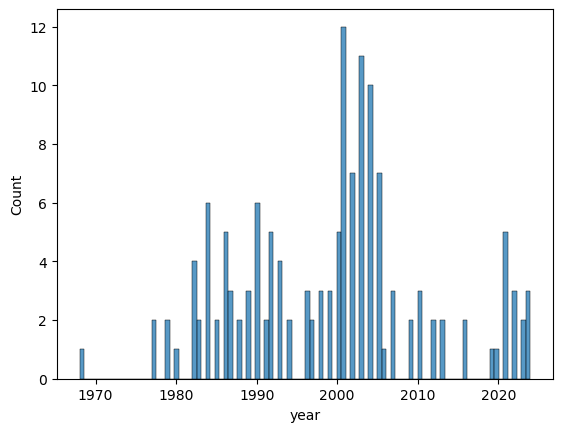

In [80]:
sns.histplot(num.year, bins=100)
plt.show()

In [ ]:
### Histograma de rmse

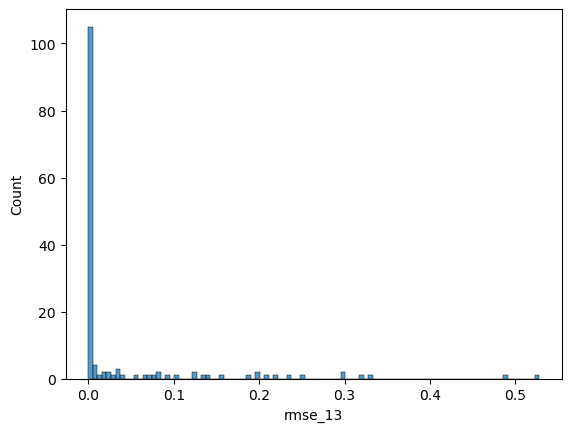

In [86]:
sns.histplot(num.rmse_13, bins=100)
plt.show()

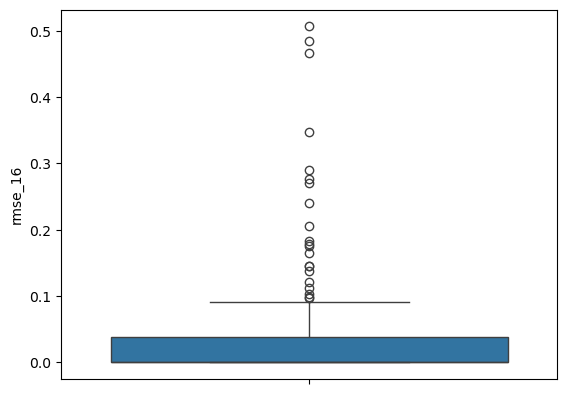

In [94]:
sns.boxplot(data=num.rmse_16)
plt.show()

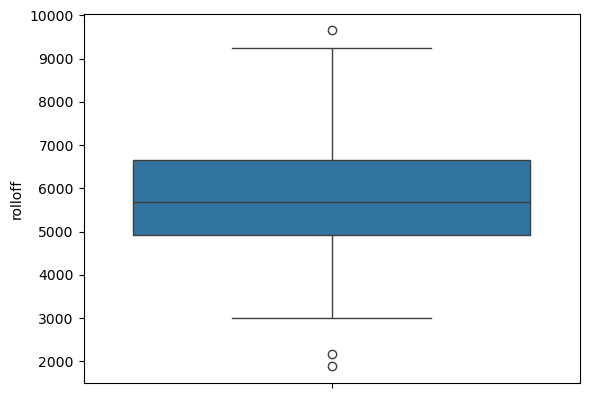

In [96]:
sns.boxplot(data=num.rolloff)
plt.show()

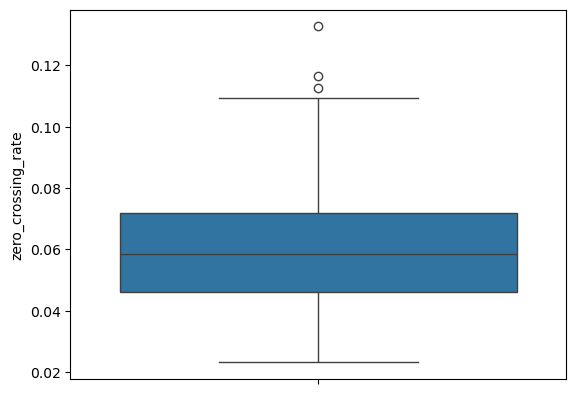

In [100]:
sns.boxplot(data=num.zero_crossing_rate)
plt.show()

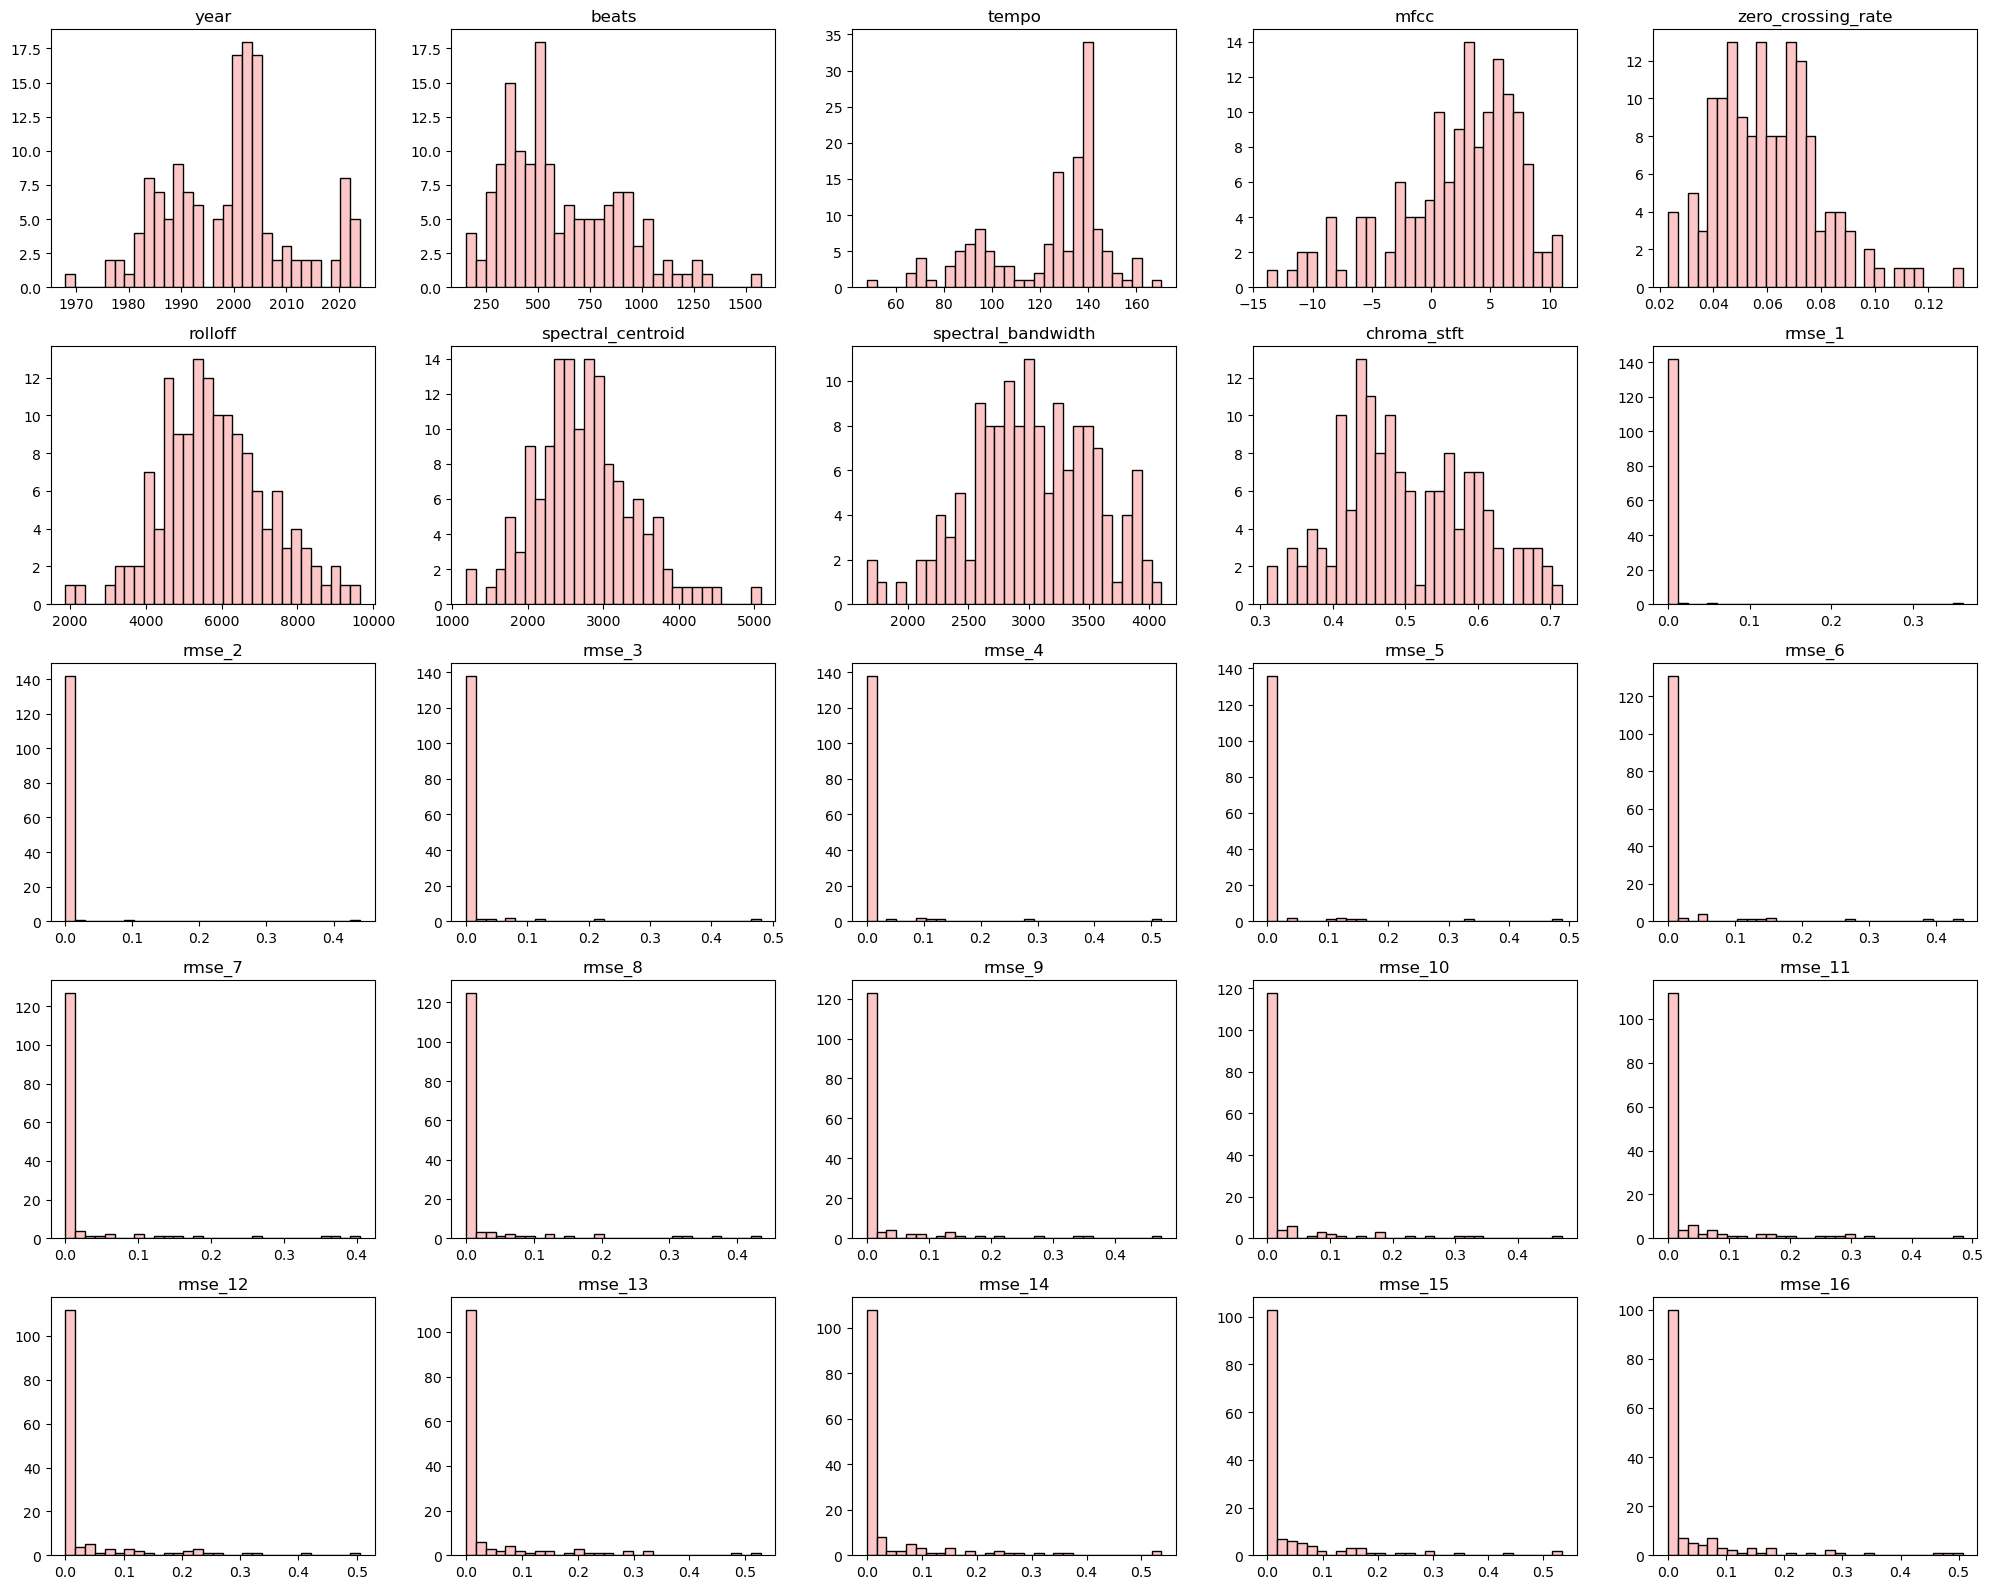

In [108]:
color = '#fec7c7'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

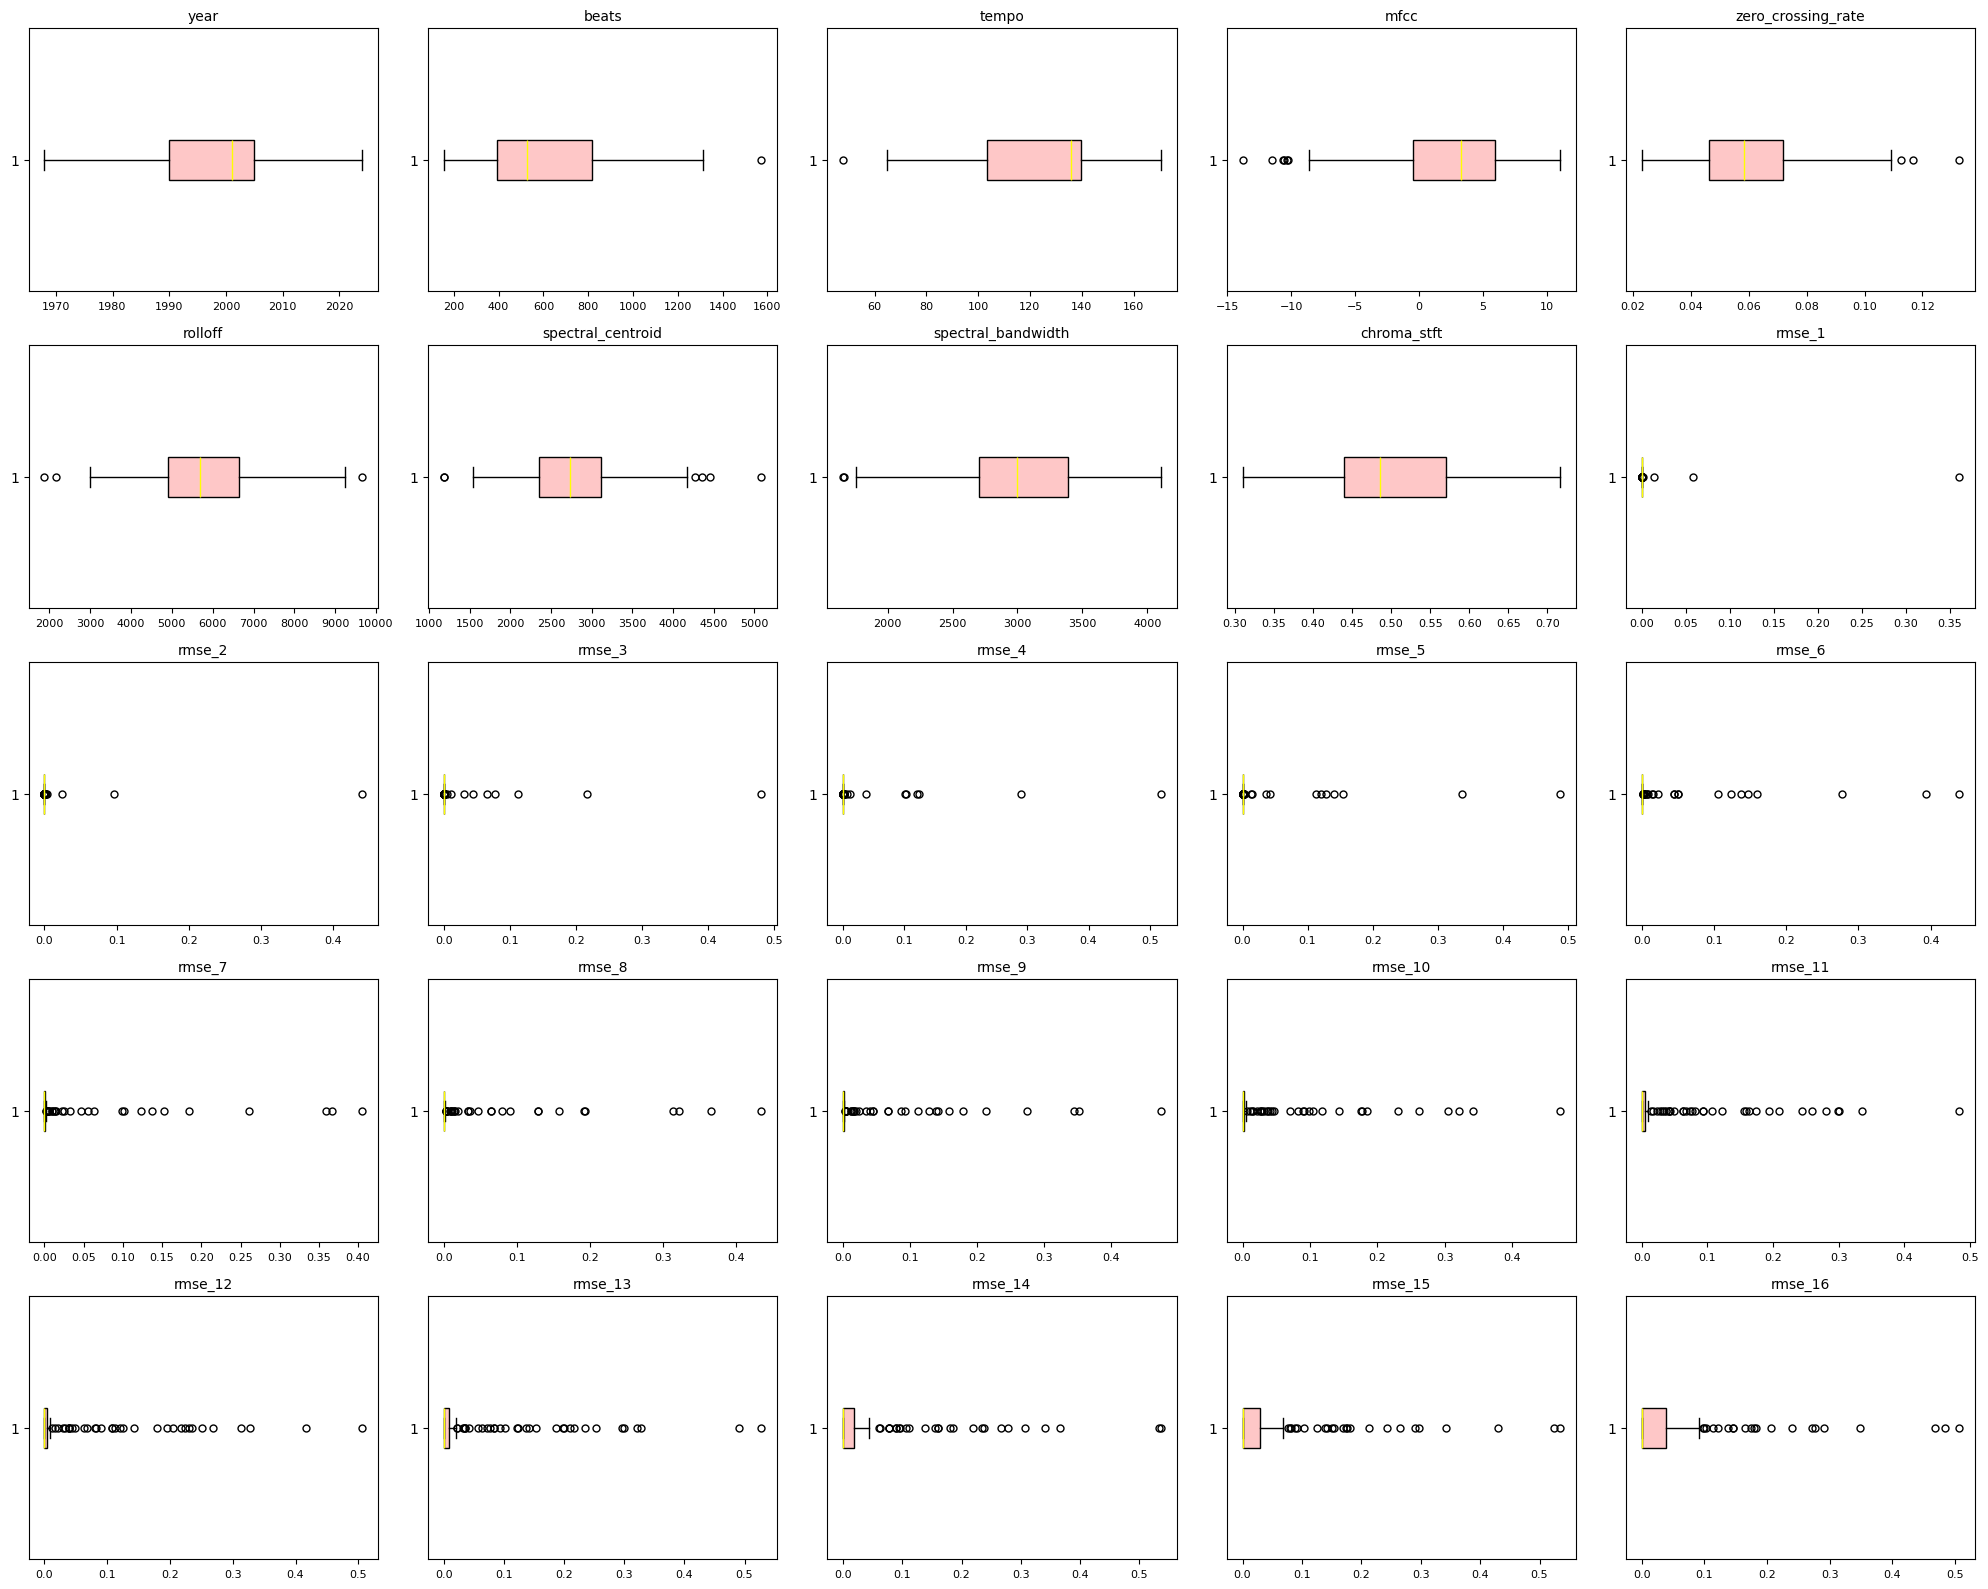

In [106]:
color = '#fec7c7'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [110]:
freq = musica['subgenre'].value_counts()

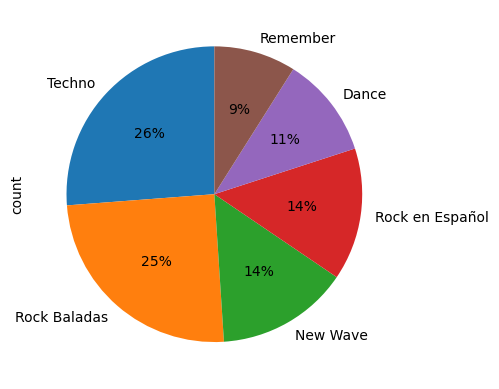

In [112]:
freq.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

In [114]:
freq = musica['genre'].value_counts()

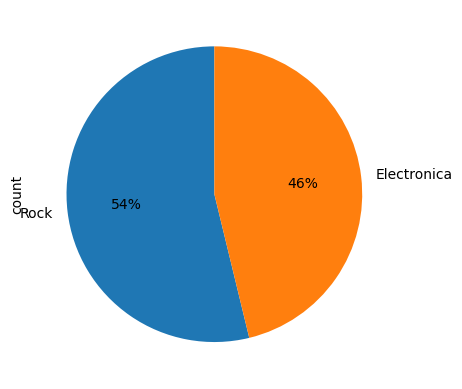

In [116]:
freq.plot.pie(autopct='%1.0f%%' ,startangle=90)
plt.show()

In [ ]:
crosstab_result.plot(kind='bar', stacked=True)
plt.show()